# Import Libraries

In this notebook I have created a model which recognize hand weitten digits.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load Dataset

For this project I have used MNIST dataset


In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalization of Input Data

In [3]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [4]:
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Data Visualization

In [6]:
def display_some_example(examples, labels):
    plt.figure(figsize=(10, 10))

    for i in range(25):
        index = np.random.randint(0, examples.shape[0]-1)
        img = examples[index]
        label = labels[index]

        plt.subplot(5, 5, i+1)
        plt.title(str(label))
        plt.tight_layout()
        plt.imshow(img, cmap='gray')
    plt.show()


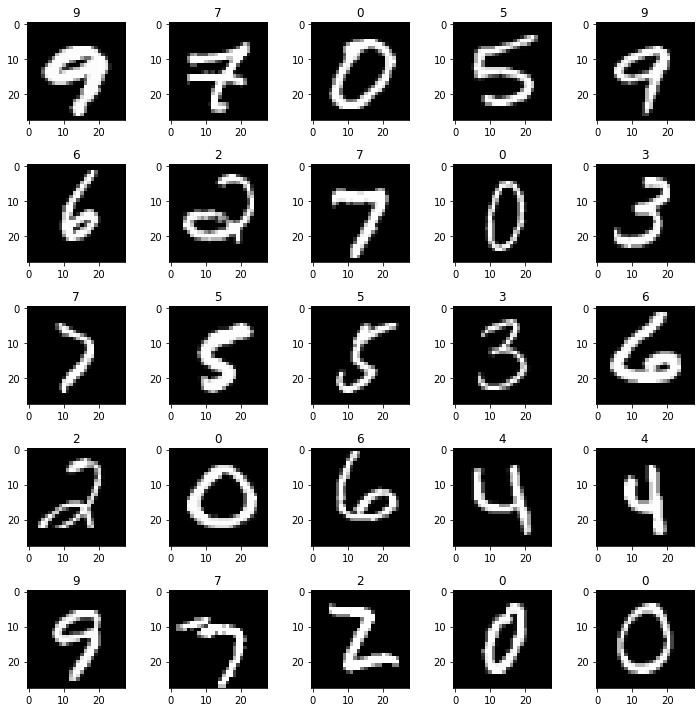

In [7]:
display_some_example(X_train,y_train)

# Model

In [8]:

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.GlobalAvgPool2D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [9]:
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(X_train, y_train, batch_size=64, epochs=3, validation_split=0.2)
model.evaluate(X_test, y_test, batch_size=64)

Epoch 1/3
750/750 [==============================] - 34s 29ms/step - loss: 0.2364 - accuracy: 0.9359 - val_loss: 0.1248 - val_accuracy: 0.9653
Epoch 2/3
750/750 [==============================] - 17s 22ms/step - loss: 0.0547 - accuracy: 0.9833 - val_loss: 0.0912 - val_accuracy: 0.9714
Epoch 3/3
157/157 [==============================] - 2s 14ms/step - loss: 0.0883 - accuracy: 0.9724


[0.0882570892572403, 0.9724000096321106]

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 5, 128)         5

# Web-Application of this Model

In [11]:
import gradio as gr

In [12]:
def predict_img(img):
    img_3d=img.reshape(-1,28,28,1)
    img_norm=img_3d.astype('float32')/255
    prediction=model.predict(img_norm)
    pred=np.argmax(prediction)
    return pred


In [13]:
iface=gr.Interface(predict_img,inputs="sketchpad",outputs="label")

In [ ]:
iface.launch(debug='True')